# Clustering the Countries by using Unsupervised Learning for HELP International

## Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

## About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

## Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Column
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports: Exports of goods and services per capita. Given as %age of the GDP per capita
- health: Total health spending per capita. Given as %age of GDP per capita
- imports: Imports of goods and services per capita. Given as %age of the GDP per capita
- Income: Net income per person
- Inflation: The measurement of the annual growth rate of the Total GDP
- life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [167]:
import pandas as pd
df = pd.read_csv('Country-data.csv', sep = ',', engine = 'python')
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [168]:
# handle missing checking
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

C:\Users\Student\AppData\Local\Temp\ipykernel_6088\146820023.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='exports', y='imports', data=plot_df, ax=ax[0,0], palette='viridis', alpha=0.5)
C:\Users\Student\AppData\Local\Temp\ipykernel_6088\146820023.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='health', y='child_mort', data=plot_df, ax=ax[0,1], palette='cubehelix', alpha=0.5)
C:\Users\Student\AppData\Local\Temp\ipykernel_6088\146820023.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='life_expec', y='total_fer', data=plot_df, ax=ax[1,0], palette='deep', alpha=0.5)
C:\Users\Student\AppData\Local\Temp\ipykernel_6088\146820023.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='income', y='gdpp', data=plot_df, ax=ax[1,1], palette='rocket', alpha=0.5)


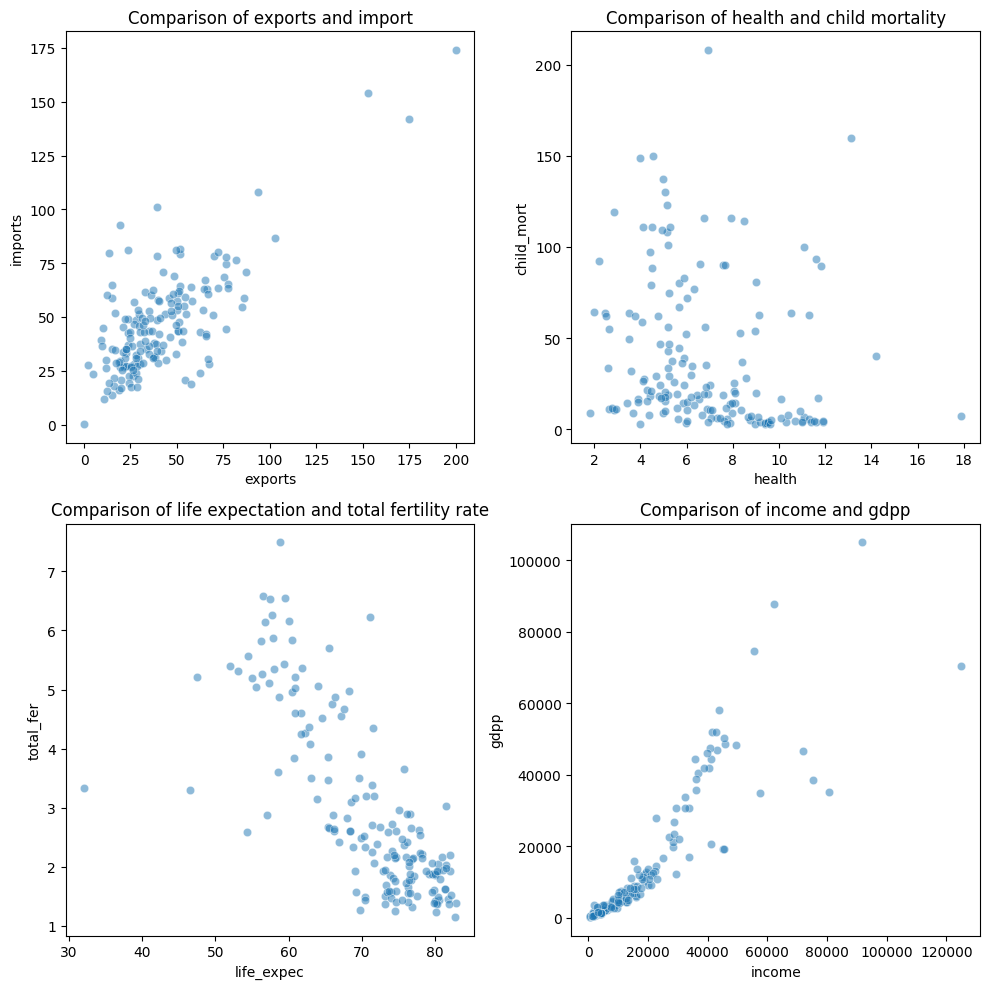

In [169]:
# analysis salary data in us dollar by using work_year, experience_level, employment_type
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'path_to_dataset.csv' with the actual path)
plot_df = df.copy()

# Create a figure with a single subplot
fig, ax = plt.subplots(2,2,figsize=(10,10))
# outliner_plot = plot_df[plot_df["gdpp"]<=20000 and plot_df["income"]<=20000]

sns.scatterplot(x='exports', y='imports', data=plot_df, ax=ax[0,0], palette='viridis', alpha=0.5)
ax[0,0].set_title('Comparison of exports and import')

sns.scatterplot(x='health', y='child_mort', data=plot_df, ax=ax[0,1], palette='cubehelix', alpha=0.5)
ax[0,1].set_title('Comparison of health and child mortality')

sns.scatterplot(x='life_expec', y='total_fer', data=plot_df, ax=ax[1,0], palette='deep', alpha=0.5)
ax[1,0].set_title('Comparison of life expectation and total fertility rate')

sns.scatterplot(x='income', y='gdpp', data=plot_df, ax=ax[1,1], palette='rocket', alpha=0.5)
ax[1,1].set_title('Comparison of income and gdpp')

# Show the plot
plt.tight_layout()
plt.show()

In [170]:
columns = ["life_expec","total_fer"]

selected_df = df[columns].copy()
selected_df

,life_expec,total_fer
0,56.2,5.82
1,76.3,1.65
2,76.5,2.89
3,60.1,6.16
4,76.8,2.13
...,...,...
162,63.0,3.50
163,75.4,2.47
164,73.1,1.95
165,67.5,4.67


In [171]:
# normalized data
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
features = std.fit_transform(selected_df)
# features

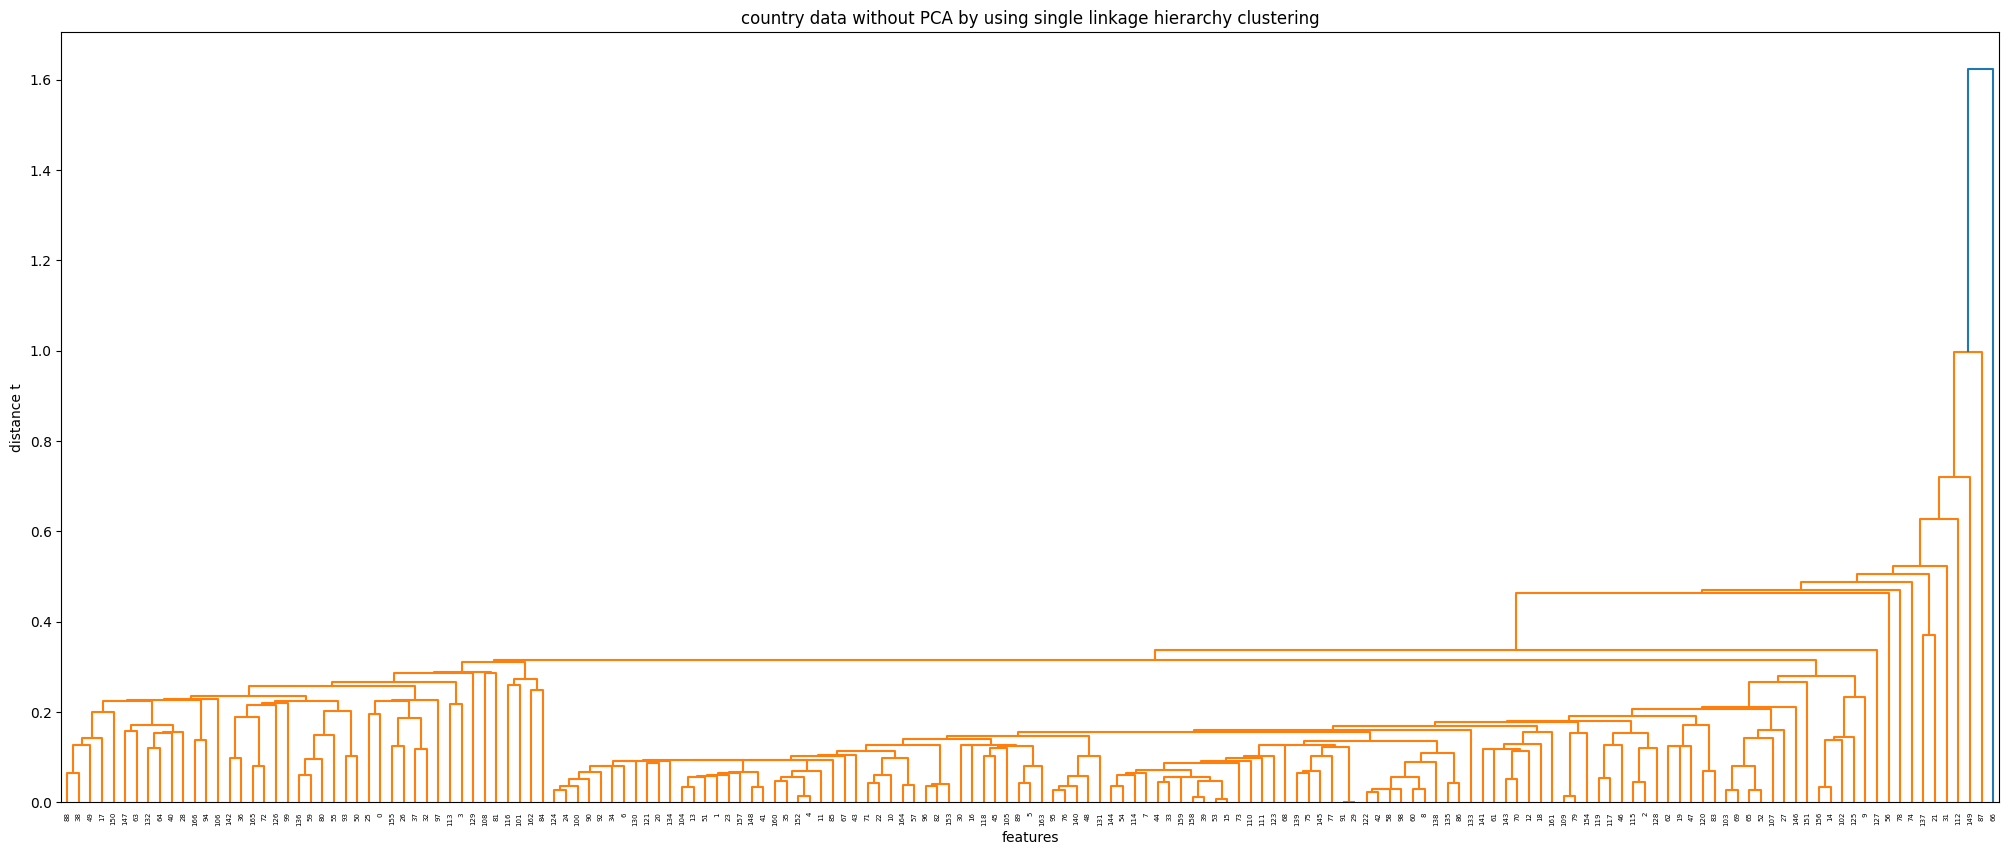

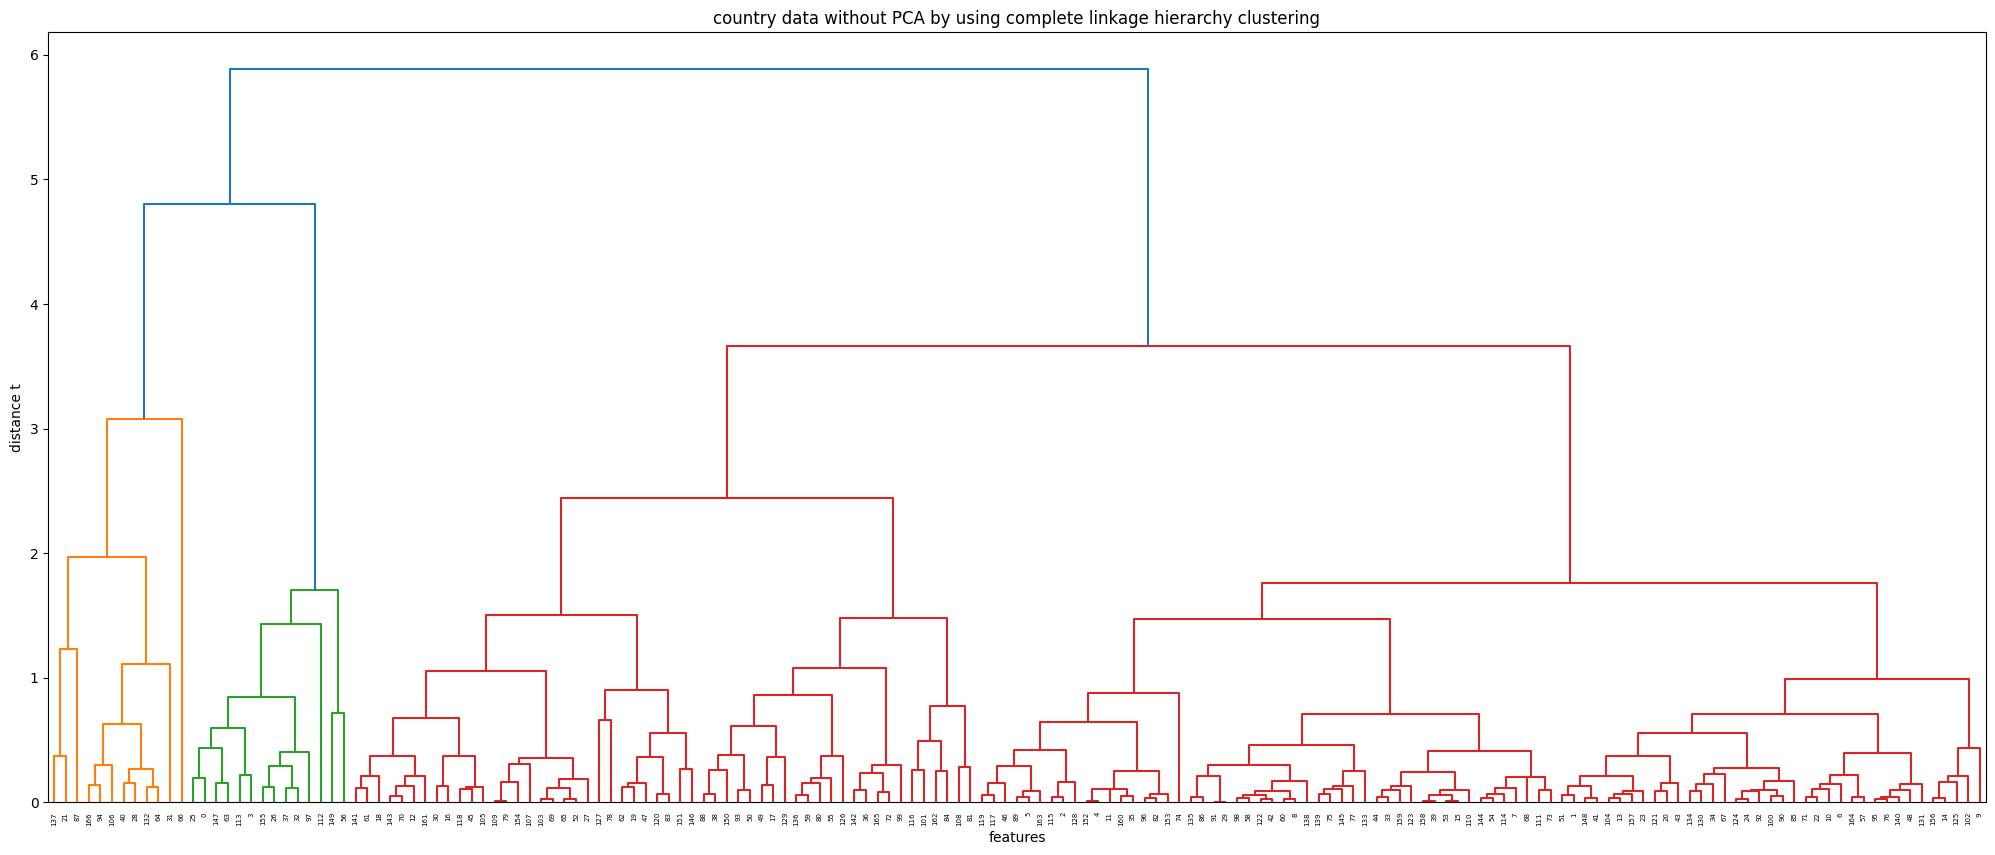

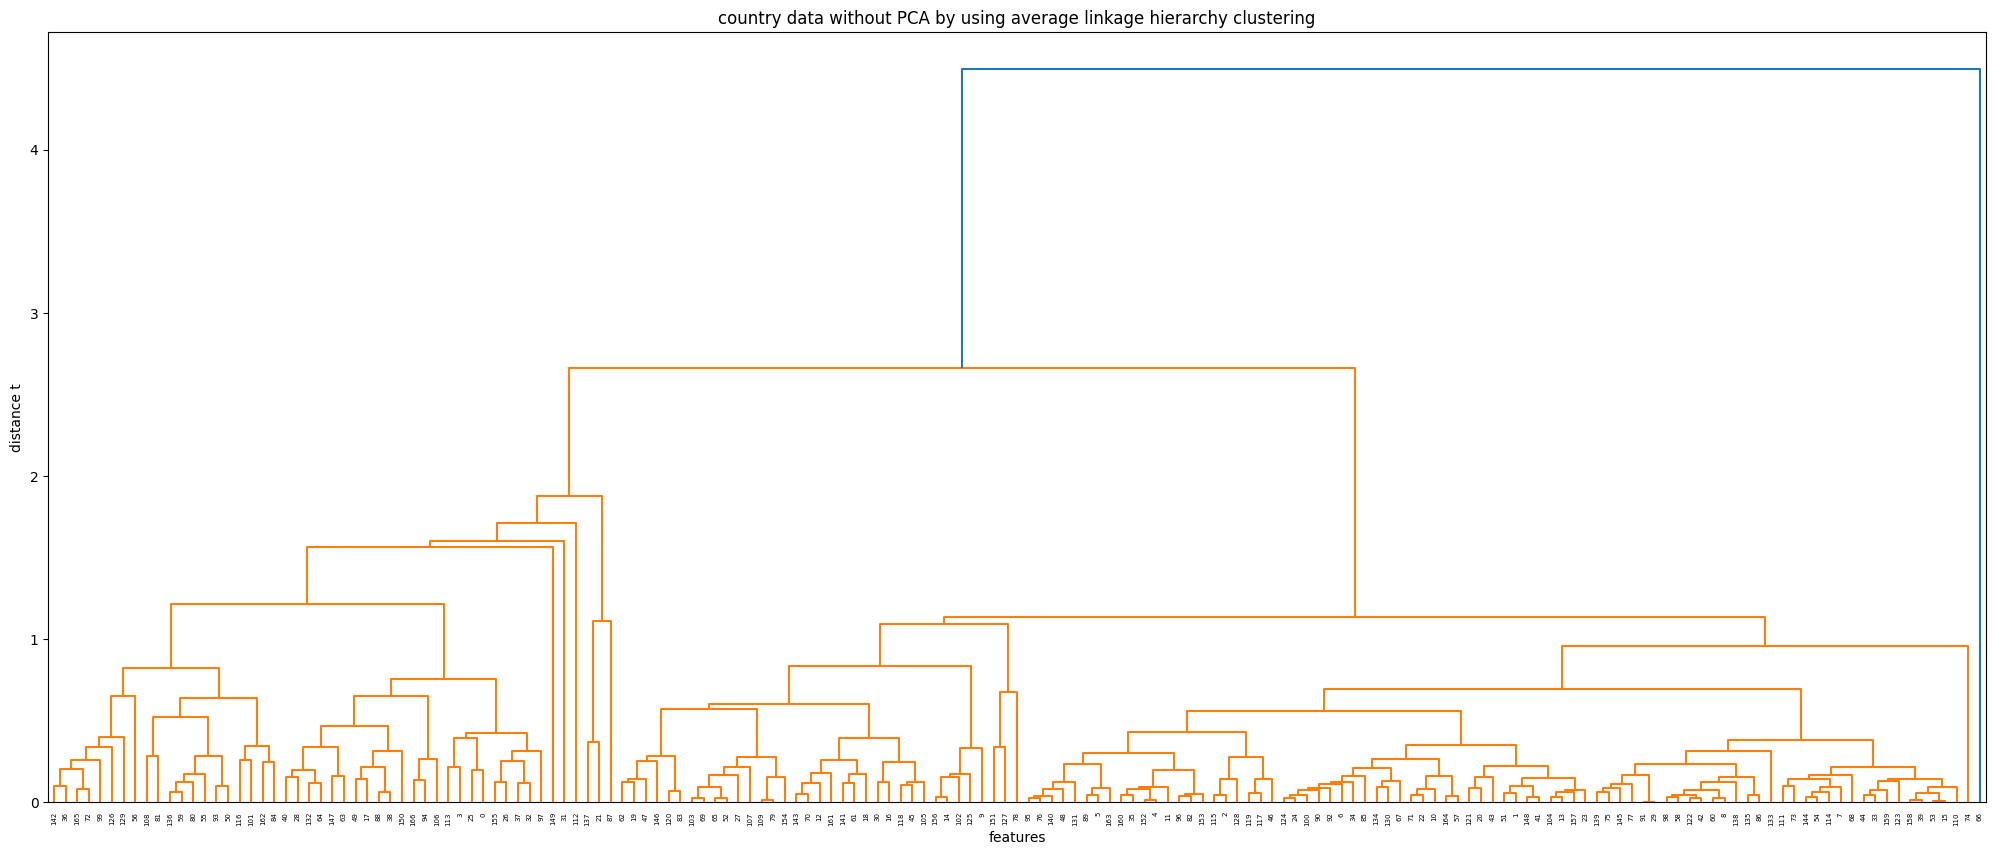

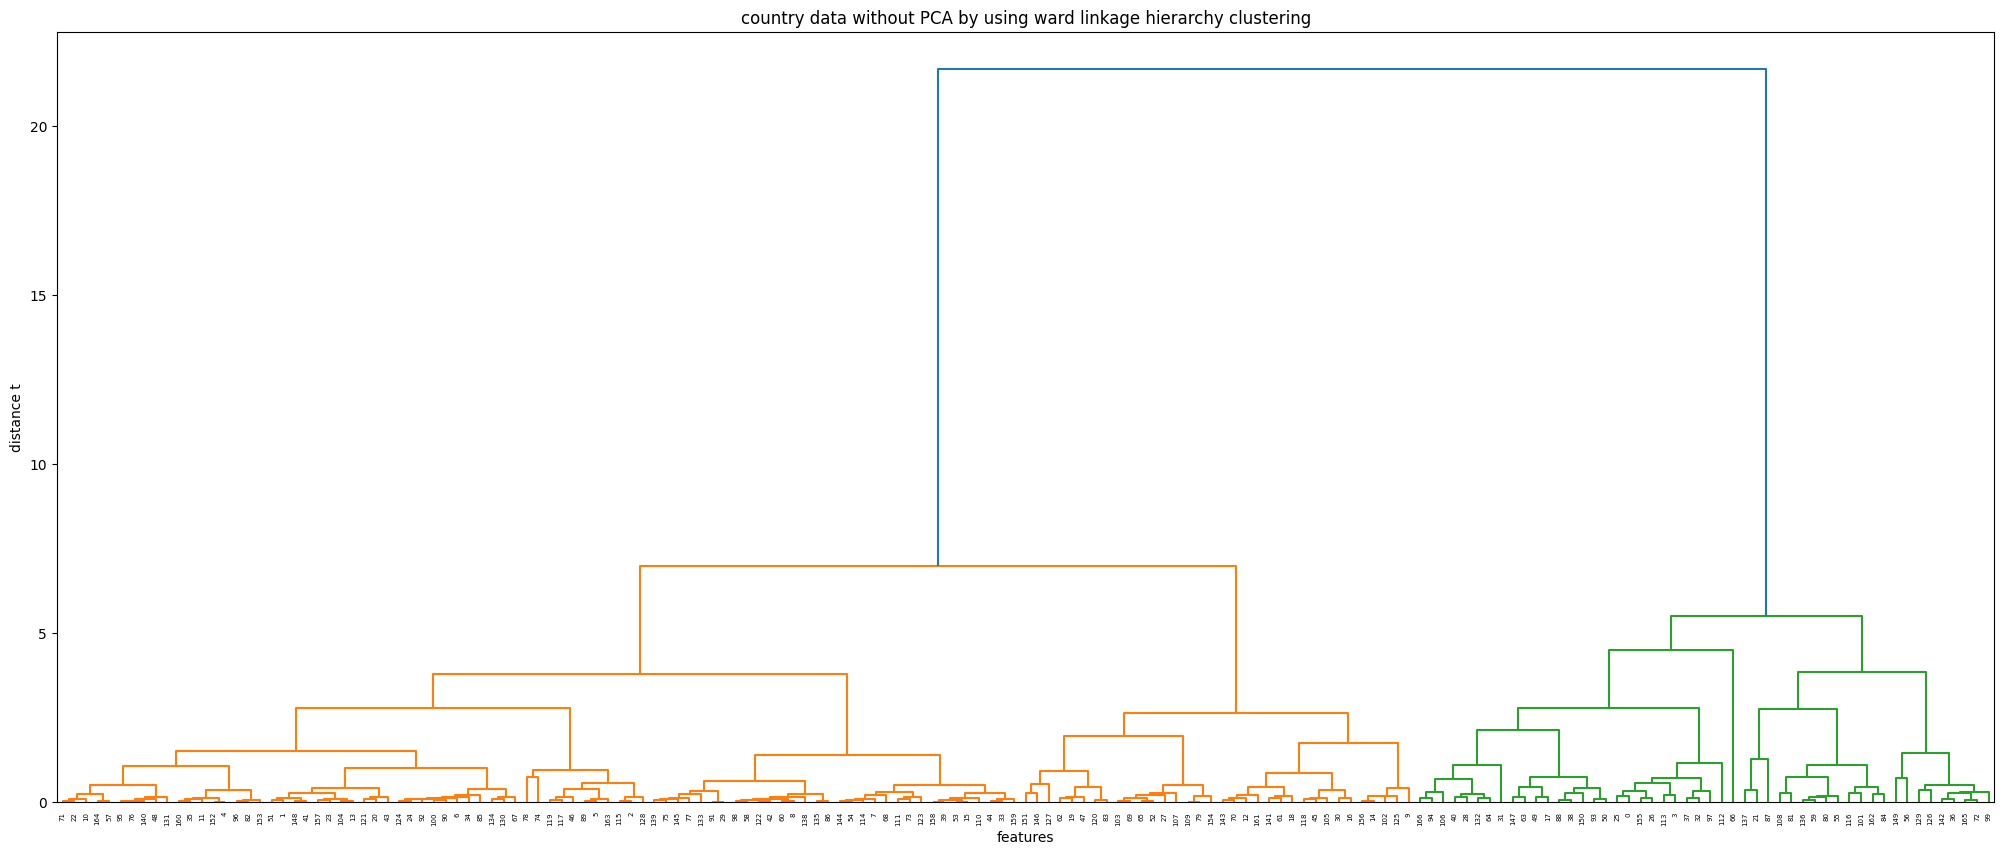

In [190]:
# heirarchy cluster
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from numpy import arange

# Create a linkage object.
methods = ['single','complete','average','ward']
linkage_col = dict()
for method in methods:
    # Create the figure and set it's size.
    plt.figure(figsize=(25,10))
    
    linkage_col[method] = linkage(features, method=method)
    

    # Make a dendrogram from the linkage object.
    dendrogram(linkage_col[method], orientation='top', distance_sort='descending')
    
    plt.xlabel("features")
    plt.ylabel("distance t")
    plt.title(f"country data without PCA by using {method} linkage hierarchy clustering")
    plt.show()

<Figure size 1500x1000 with 0 Axes>

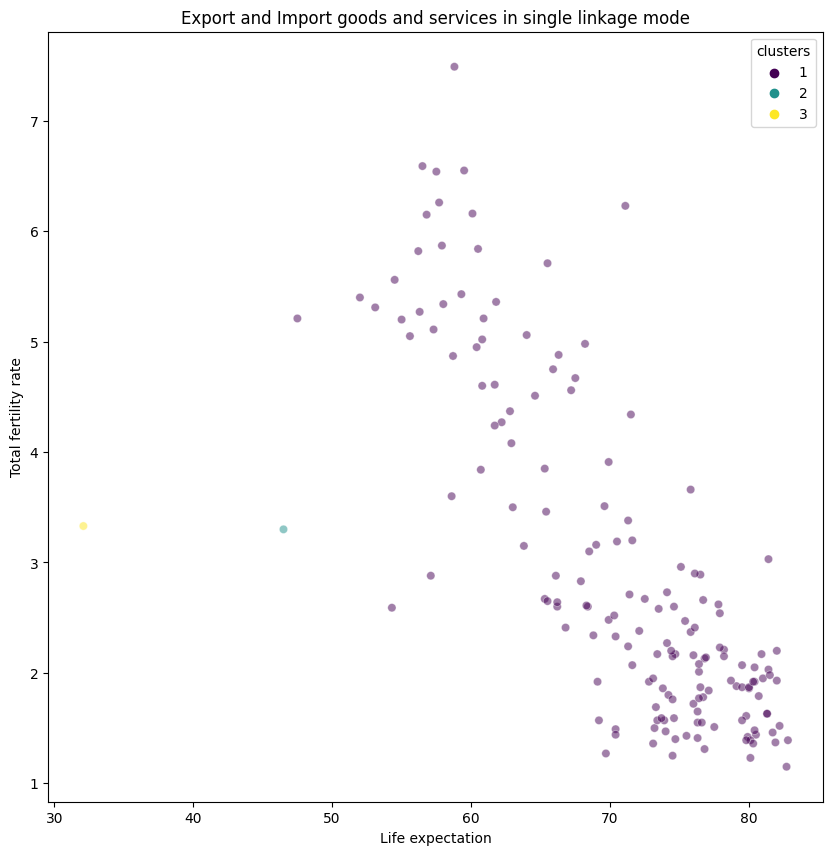

<Figure size 1500x1000 with 0 Axes>

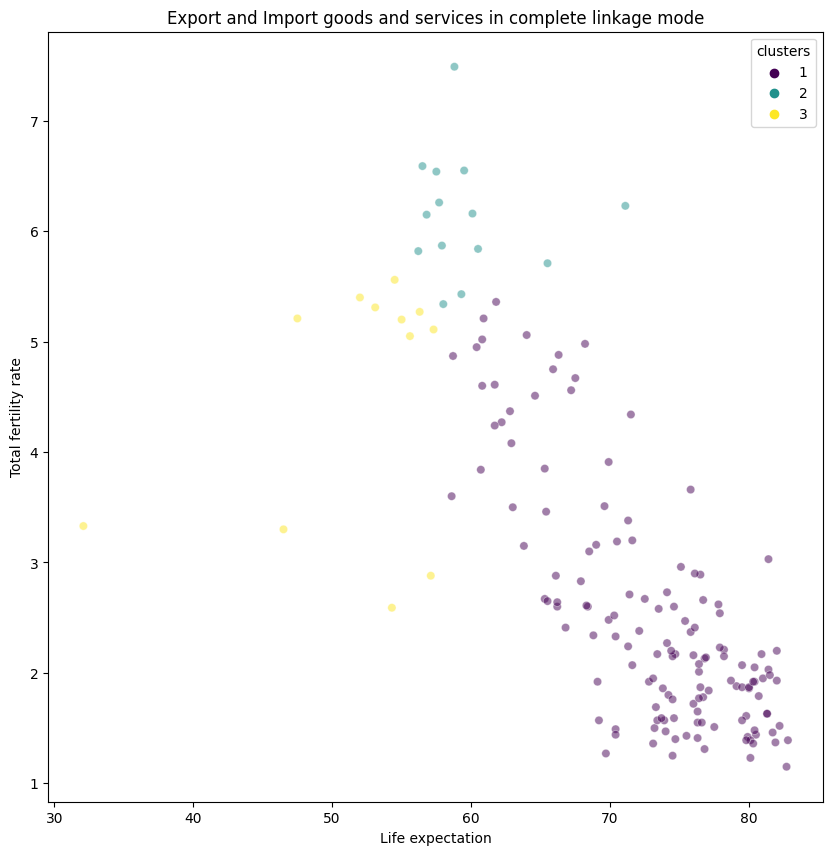

<Figure size 1500x1000 with 0 Axes>

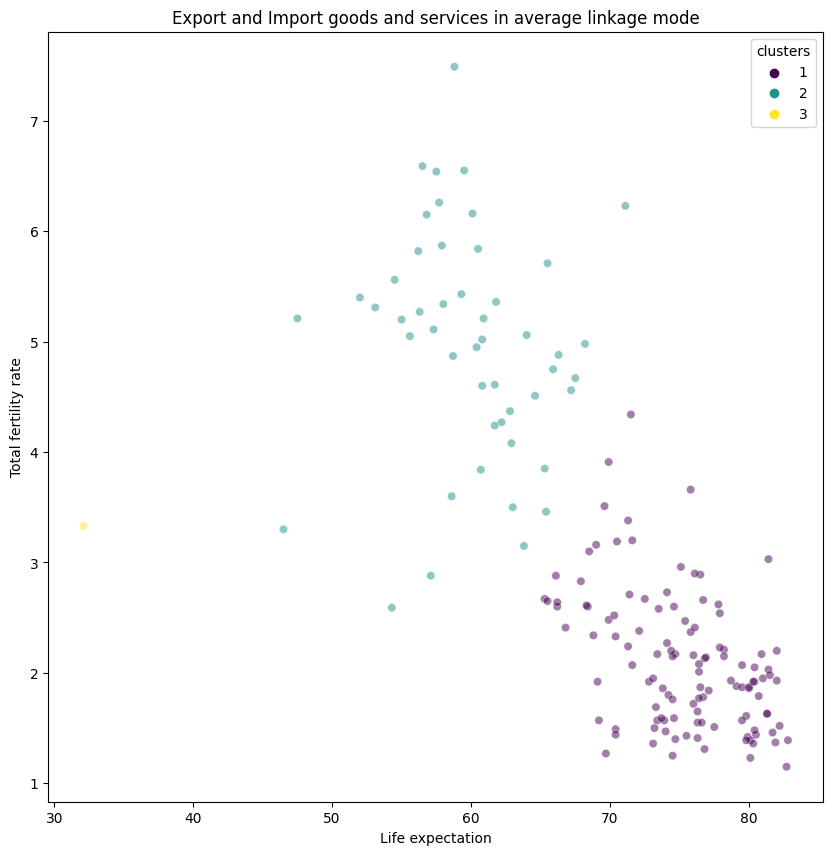

<Figure size 1500x1000 with 0 Axes>

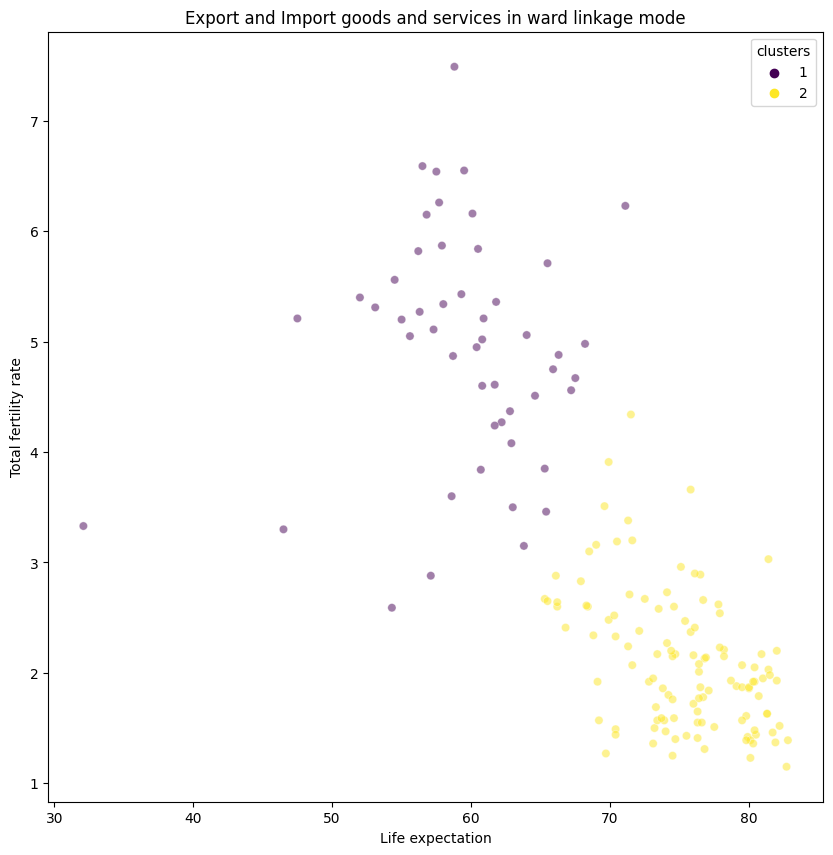

In [189]:
# Determine the clusters using fcluster
from scipy.cluster.hierarchy import fcluster


max_d = [0.8,4,2,10]  # Adjust this value based on the dendrogram
i = 0

cluster_df = df.copy()
del cluster_df["country"]
for method in methods:
    clusters = fcluster(linkage_col[method], t=max_d[i], criterion='distance')

    # Add the cluster labels to the DataFrame
    cluster_df['Cluster_'+method] = clusters

    # Plot the clusters
    plt.figure(figsize=(15, 10))

    # # Create scatter plot for each cluster
    # for cluster_id in selected_df['Cluster'].unique():
    #     cluster_df = cluster_df[cluster_df['Cluster'] == cluster_id]
    
    # sns.boxplot(x="work_year", y="salary_in_usd", data=cluster_df ,hue='Cluster', palette="deep")
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x='life_expec', y='total_fer', data=cluster_df, hue='Cluster_'+method, ax=ax, palette='viridis', alpha=0.5, )
    ax.set_title('Comparison of life expectation and total fertility rate')
    
    plt.ylabel("Total fertility rate")
    plt.xlabel("Life expectation")
    plt.title(f"Export and Import goods and services in {method} linkage mode")
    plt.legend(title="clusters",loc="upper right")
    plt.show()
    i = i + 1

In [194]:
# evaluation
from sklearn.metrics import silhouette_score
sil_scores = dict()
# ri_scores = dict()
# adr_scores = dict()
# nmi_scores = dict()

for method in methods:
    sil_scores[method] = round(silhouette_score(features,cluster_df['Cluster_'+method]),4) # use features check

print(f"silhouette score of features: \n{sil_scores}")

silhouette score of features: 
{'single': -0.6056, 'complete': -0.0797, 'average': -0.2841, 'ward': 0.159}


C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: 

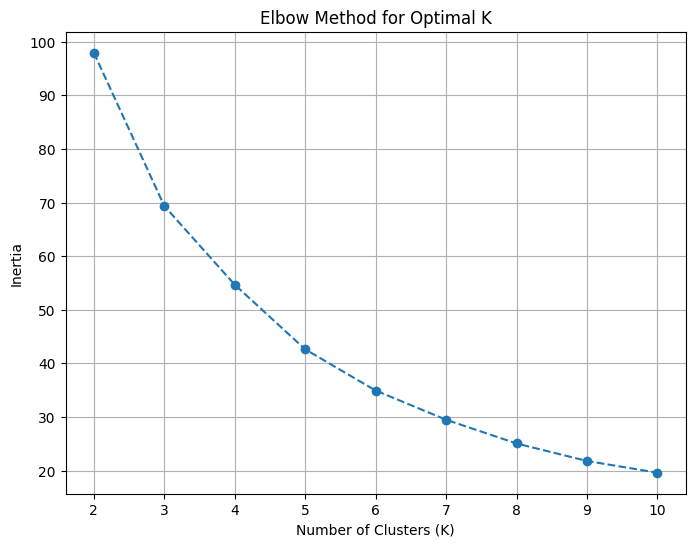

In [195]:
from sklearn.cluster import KMeans
inertia_values = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


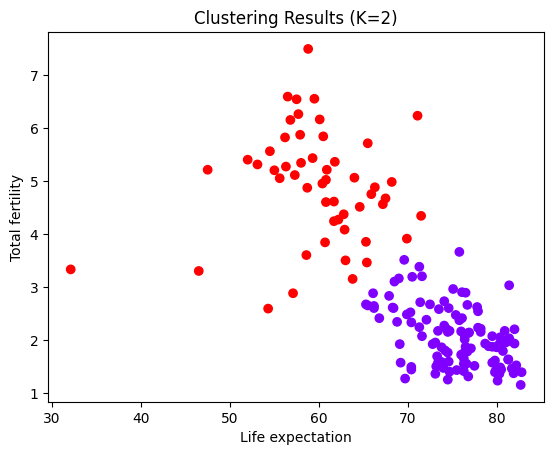

In [196]:
curvature = np.diff(inertia_values, 2)
best_k = curvature.argmax() + 2

best_kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_df['Cluster_Kmean'] = best_kmeans.fit_predict(features)

plt.scatter(cluster_df['life_expec'], cluster_df['total_fer'], c=cluster_df['Cluster_Kmean'], cmap='rainbow')
plt.xlabel('Life expectation')
plt.ylabel('Total fertility')
plt.title(f'Clustering Results (K={best_k})')
plt.show()

C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: 

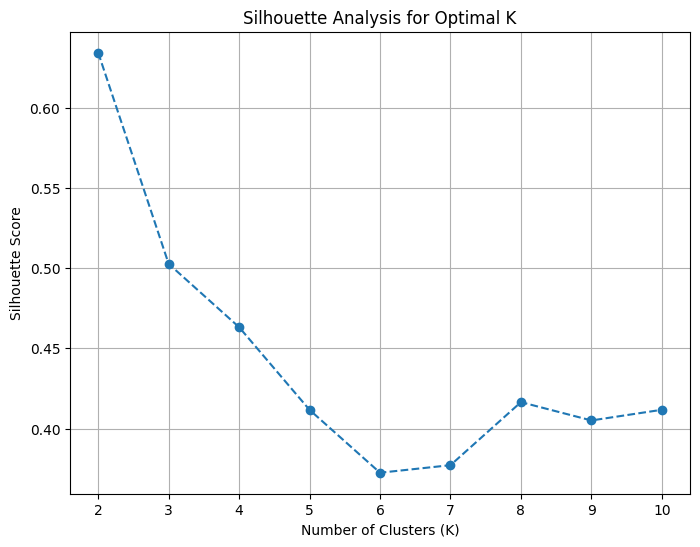

In [180]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.grid(True)
plt.show()

In [197]:
cluster_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_single,Cluster_complete,Cluster_average,Cluster_ward,Cluster_Kmean
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,5,3,8,2,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,5,7,11,5,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,5,7,11,5,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,5,4,8,2,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5,7,11,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,5,7,11,1,1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,5,7,11,5,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,5,6,5,5,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,5,3,8,2,1


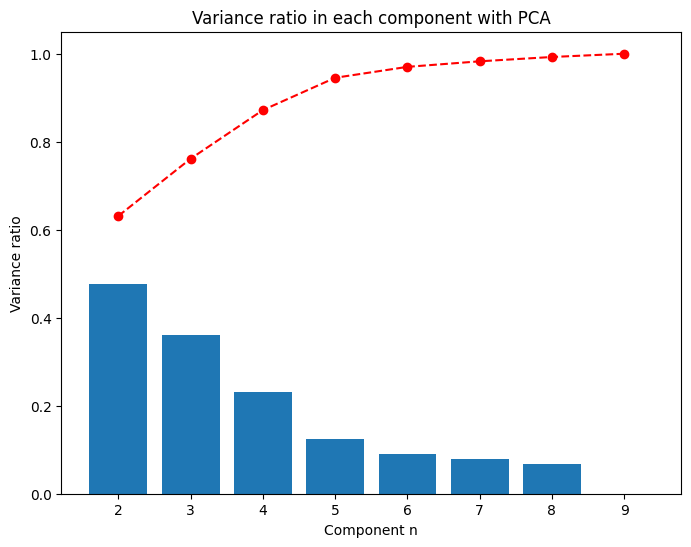

In [202]:
from sklearn.decomposition import PCA
# PCA technic
# normalized data
std = StandardScaler()
vector = df.copy()
del vector["country"]
pca_before_features = std.fit_transform(vector)

nums = range(2,10)

var_ratio = []
sum_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit_transform(pca_before_features)
  var_ratio.append(pca.noise_variance_)
  sum_ratio.append(np.sum(pca.explained_variance_ratio_))

# print(var_ratio)
plt.figure(figsize=(8, 6))
plt.bar(nums, var_ratio)
plt.plot(nums, sum_ratio, marker='o', linestyle='--', color='red')
plt.xlabel('Component n')
plt.ylabel('Variance ratio')
plt.title('Variance ratio in each component with PCA')
# plt.grid(True)
plt.show()

In [214]:
# heirarchy cluster
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
pca_features = pca.fit_transform(pca_before_features)

# Create a linkage object.
methods = ['single','complete','average','ward']
linkage_col_pca = dict()
for method in methods:
    # Create the figure and set it's size.
    plt.figure(figsize=(25,10))
    
    linkage_col_pca[method] = linkage(pca_features, method=method)
    
    # Make a dendrogram from the linkage object.
    dendrogram(linkage_col_pca[method], orientation='top', distance_sort='descending')
    
    plt.xlabel("features")
    plt.ylabel("distance t")
    plt.title(f"country data without PCA by using {method} linkage hierarchy clustering")
    plt.show()

NameError: name 'labels' is not defined

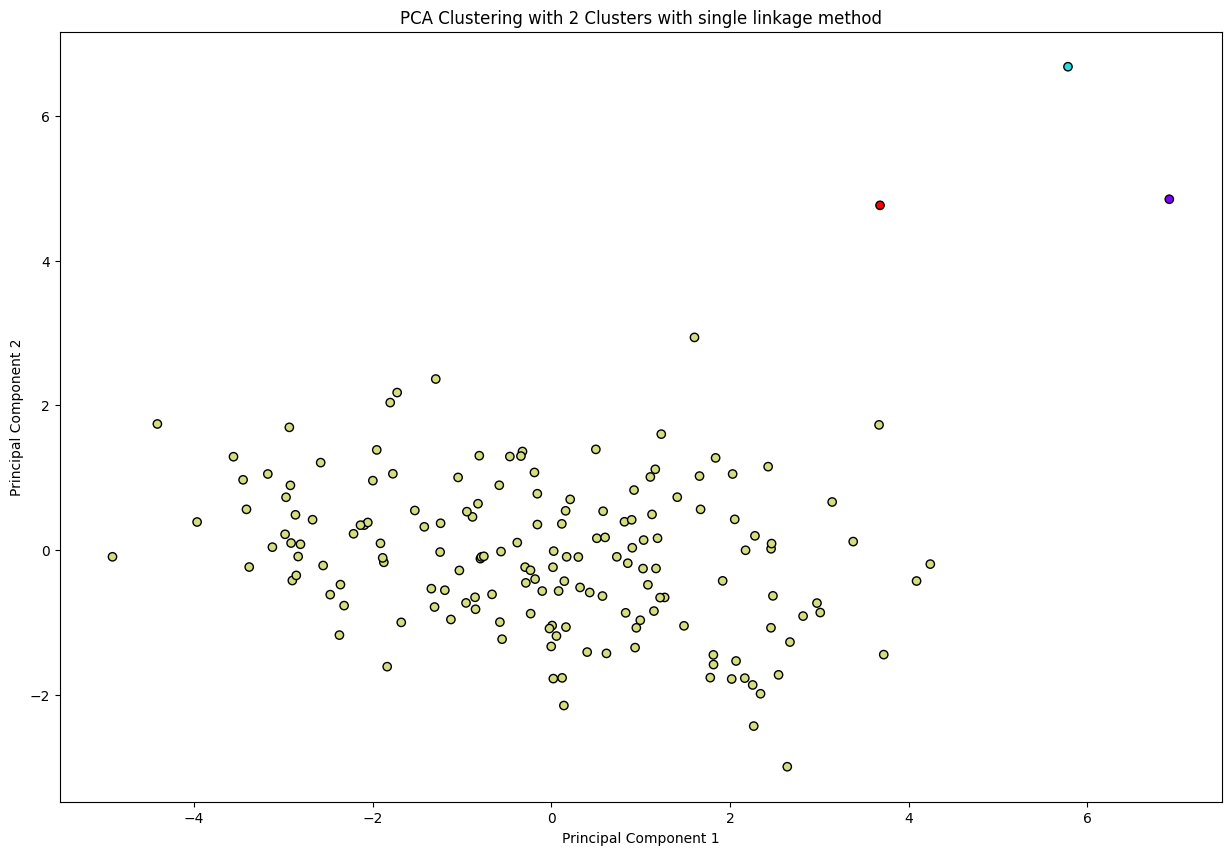

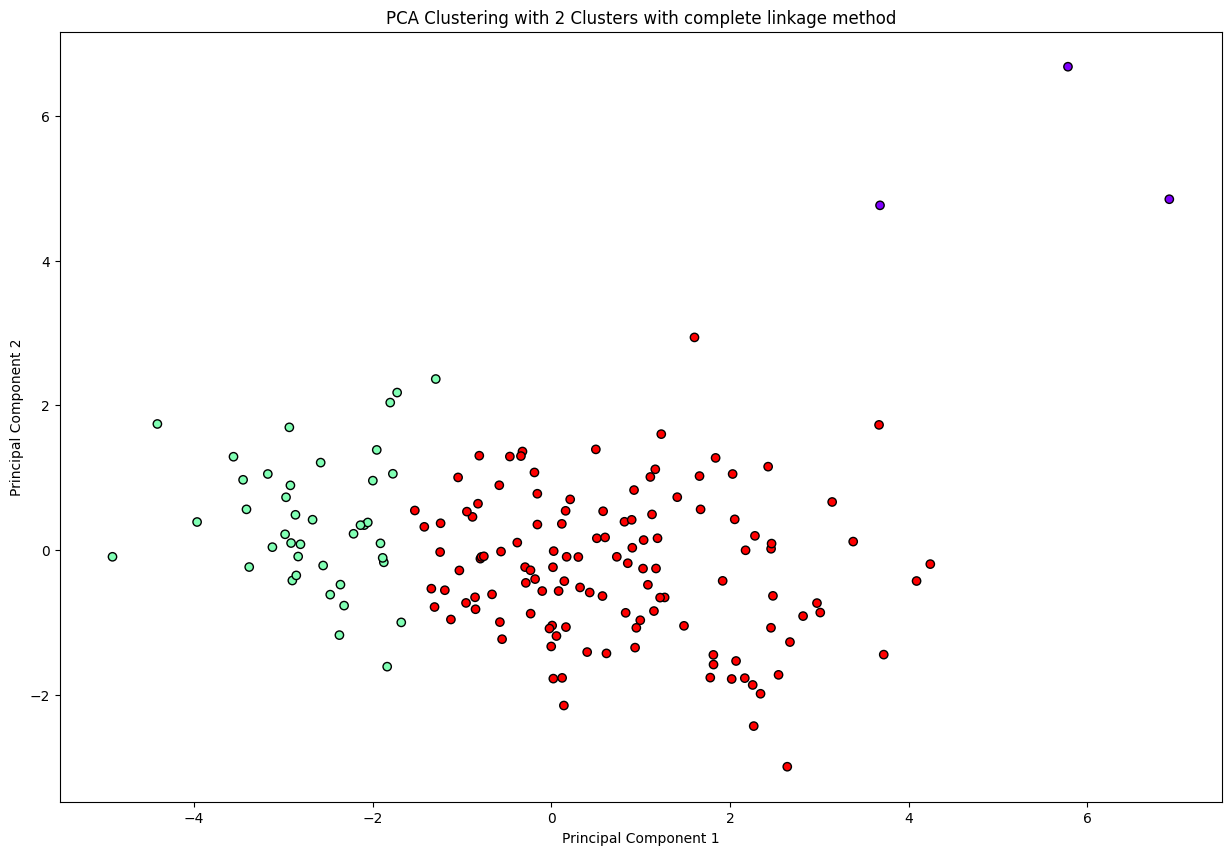

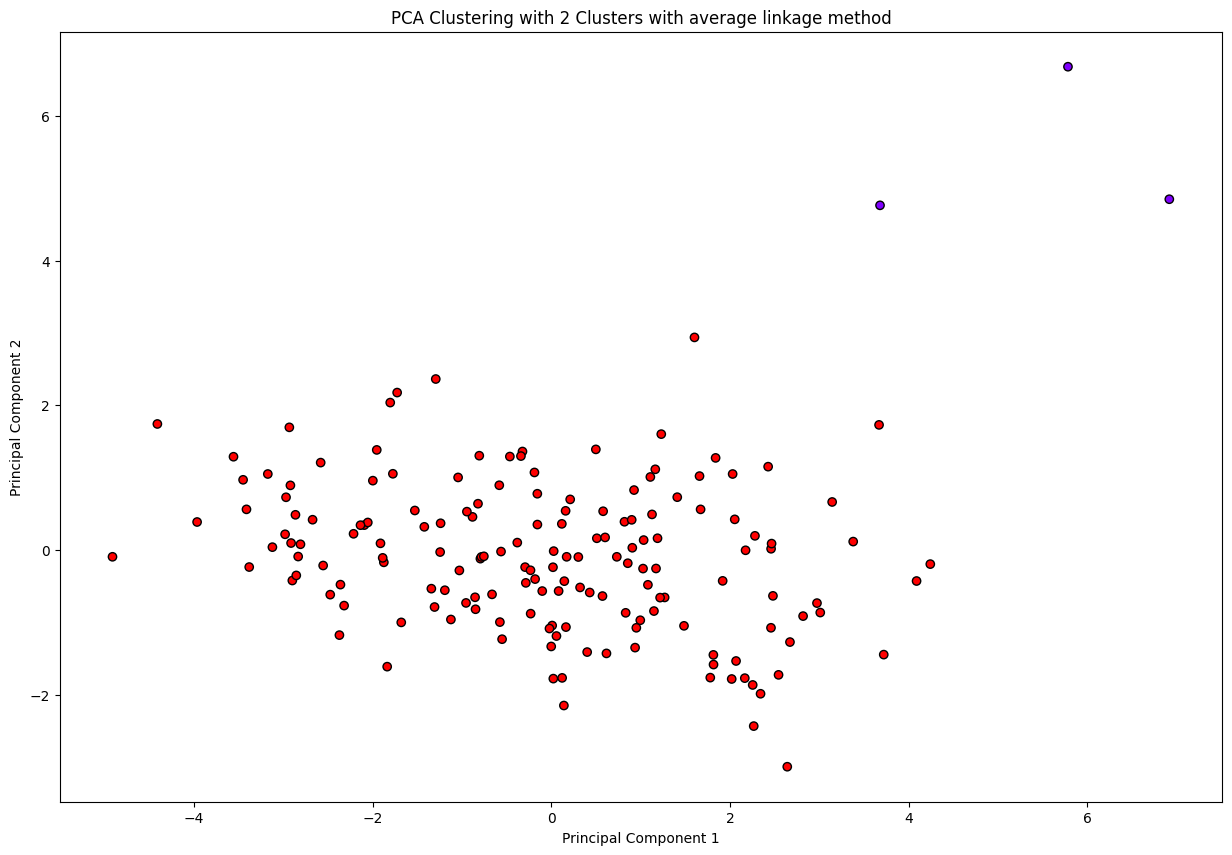

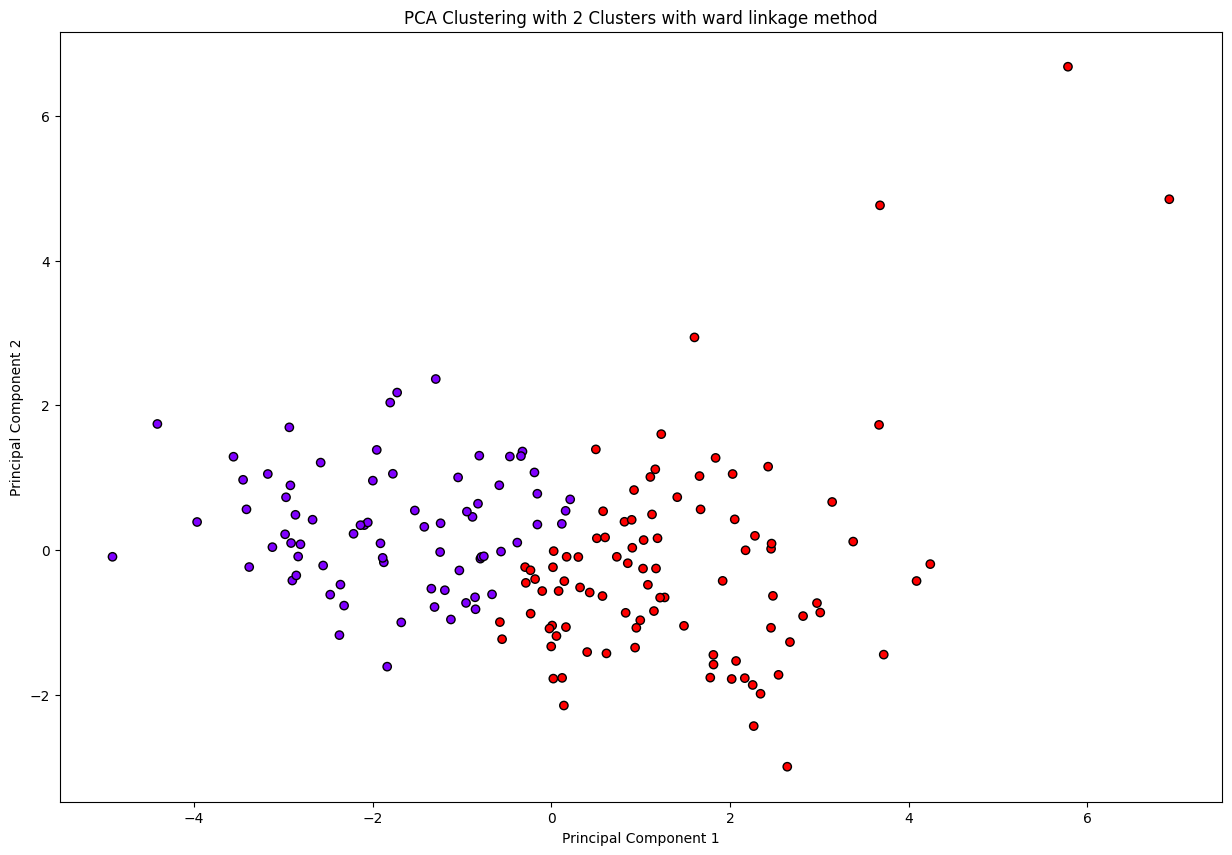

In [223]:
# Determine the clusters using fcluster
from scipy.cluster.hierarchy import fcluster


max_d = [2,7,5,20]  # Adjust this value based on the dendrogram
i = 0

cluster_df_pca = df.copy()
del cluster_df_pca["country"]
for method in methods:
    clusters = fcluster(linkage_col_pca[method], t=max_d[i], criterion='distance')

    # Add the cluster labels to the DataFrame
    cluster_df_pca['Cluster_'+method] = clusters

    # Plot the clusters
    plt.figure(figsize=(15, 10))

    # # Create scatter plot for each cluster
    # for cluster_id in selected_df['Cluster'].unique():
    #     cluster_df = cluster_df[cluster_df['Cluster'] == cluster_id]
    
    # sns.boxplot(x="work_year", y="salary_in_usd", data=cluster_df ,hue='Cluster', palette="deep")

    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_df_pca['Cluster_'+method], marker='o', edgecolors='k', cmap='rainbow')
    plt.title(f"PCA Clustering with 2 Clusters with {method} linkage method")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    # plt.legend(title="clusters",loc="upper right")
    plt.show()
    i = i + 1

In [222]:
# evaluation
from sklearn.metrics import silhouette_score
sil_scores_pca = dict()
# ri_scores = dict()
# adr_scores = dict()
# nmi_scores = dict()

for method in methods:
    sil_scores_pca[method] = round(silhouette_score(pca_features,cluster_df_pca['Cluster_'+method]),4) # use features check

print(f"silhouette score of features: \n{sil_scores_pca}")

silhouette score of features: 
{'single': 0.5585, 'complete': 0.4339, 'average': 0.6609, 'ward': 0.4072}
